In [1]:
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 16
})

SAVE_FIG = True

def save_fig(name, tight_layout = True):
    if SAVE_FIG:
        if not os.path.isdir("plots"):
            os.mkdir("plots")
        print(f"Saving figure {name} ...")
        if tight_layout:
            plt.tight_layout(pad=0.5)
        plt.savefig(f"plots/{name}.pdf", backend="pgf")

In [2]:
rng = np.random.default_rng(seed=42)

In [3]:
def gradient_descent(f, df, start, n_iterations=100, alpha=0.1):
    x = start

    styles = {
        0: ("y--", "y."),
        n_iterations - 1: ("g--", "g.")
    }

    for i in range(n_iterations):
        line_style, dot_style = styles.get(i, (None, "r."))

        m = df(x)

        if line_style is not None:
            y = f(x)
            b = y - m * x

            x1 = -1000
            y1 = m * x1 + b

            x2 = 1000
            y2 = m * x2 + b

            plt.plot([x1, x2], [y1, y2], line_style, linewidth=0.8)
        plt.plot(x, f(x), dot_style)

        x = x - alpha * m

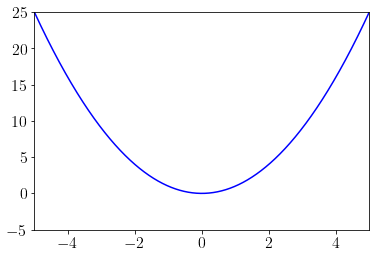

In [4]:
def f(x):
    return x**2

def df(x):
    return 2 * x

x = np.linspace(-5, 5, 2000)
y = f(x)

plt.plot(x, y, "b-")
plt.axis([-5, 5, -5, 25])
plt.show()

Saving figure gd ...


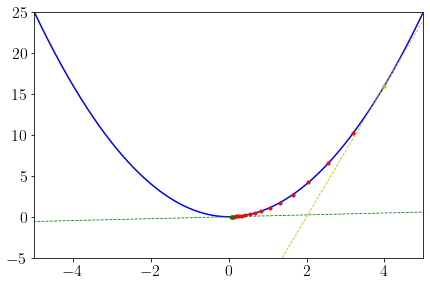

In [5]:
plt.plot(x, y, "b-")

gradient_descent(f, df, start=4, n_iterations=20)

plt.axis([-5, 5, -5, 25])
save_fig("gd")
plt.show()

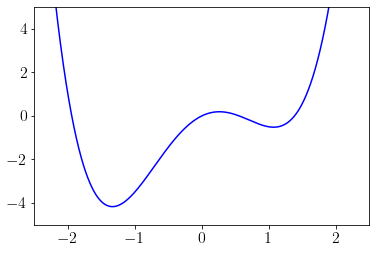

In [6]:
def g(x):
    return x**4 - 3*x**2 + 1.5*x

def dg(x):
    return 4*x**3 - 6*x + 1.5

x = np.linspace(-3, 3, 2000)
y = g(x)

plt.plot(x, y, "b-")
plt.axis([-2.5, 2.5, -5, 5])
plt.show()

Saving figure gd-mulitple-minima ...


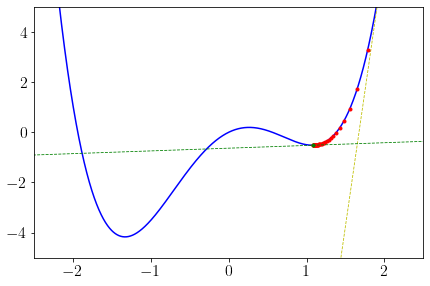

In [7]:
plt.plot(x, y, "b-")

gradient_descent(g, dg, start=2, alpha=0.01, n_iterations=40)
gradient_descent(g, dg, start=-2, alpha=0.01, n_iterations=40)

plt.axis([-2.5, 2.5, -5, 5])
save_fig("gd-mulitple-minima")
plt.show()